# Imports

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from scipy.stats import linregress

# Lab 1: 
## Plotting a GM Plateau

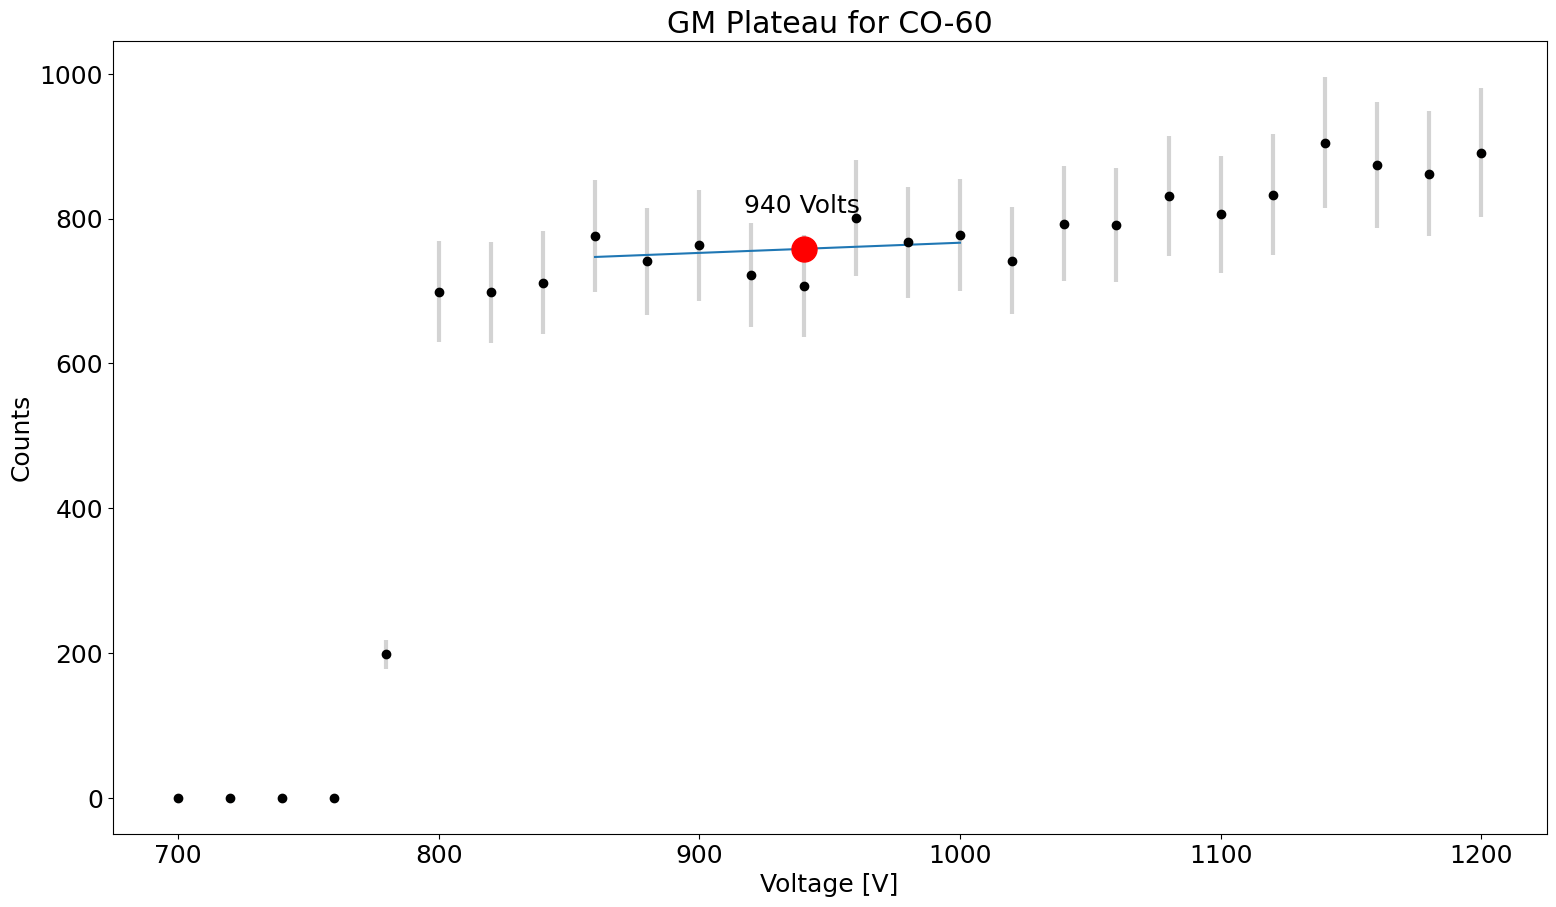

In [5]:
#open files
CO_plateau = open("217pm-lab1.tsv")
read_CO_p = csv.reader(CO_plateau, delimiter="\t")


#skip headers
for line in range(11):
    next(read_CO_p, None)


#extract data 
volt_CO = []
count_CO = []


for row in read_CO_p:
    volt_CO.append(float(row[1]))
    count_CO.append(float(row[2]))
    

#plot
plt.title('GM Plateau for CO-60')
plt.xlabel("Voltage [V]")
plt.ylabel("Counts")
plt.scatter(volt_CO,count_CO,s=15)



#errors
y_error = []

for elem in count_CO:
    y_error.append(elem*0.10)

plt.errorbar(volt_CO,count_CO, yerr= y_error, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)



#slope for plateau
m, b = np.polyfit(volt_CO[8:-10], count_CO[8:-10], 1)
slope = []

for elem in volt_CO[8:-10]:
    slope.append((m*elem)+ b)
    
plt.plot(volt_CO[8:-10], slope)

x = ((slope[-1] + slope [1])/2 - b)/m
y = (slope[-1] + slope [1])/2

plt.plot(x,y, marker="o", markersize=18, markeredgecolor="red", markerfacecolor="red")
plt.annotate("940 Volts", (x-23, y+50))


#adjust figure size
plt.rcParams["font.size"] = 18
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)
plt.show()

# Lab 2:
## Statisitics of Counting 

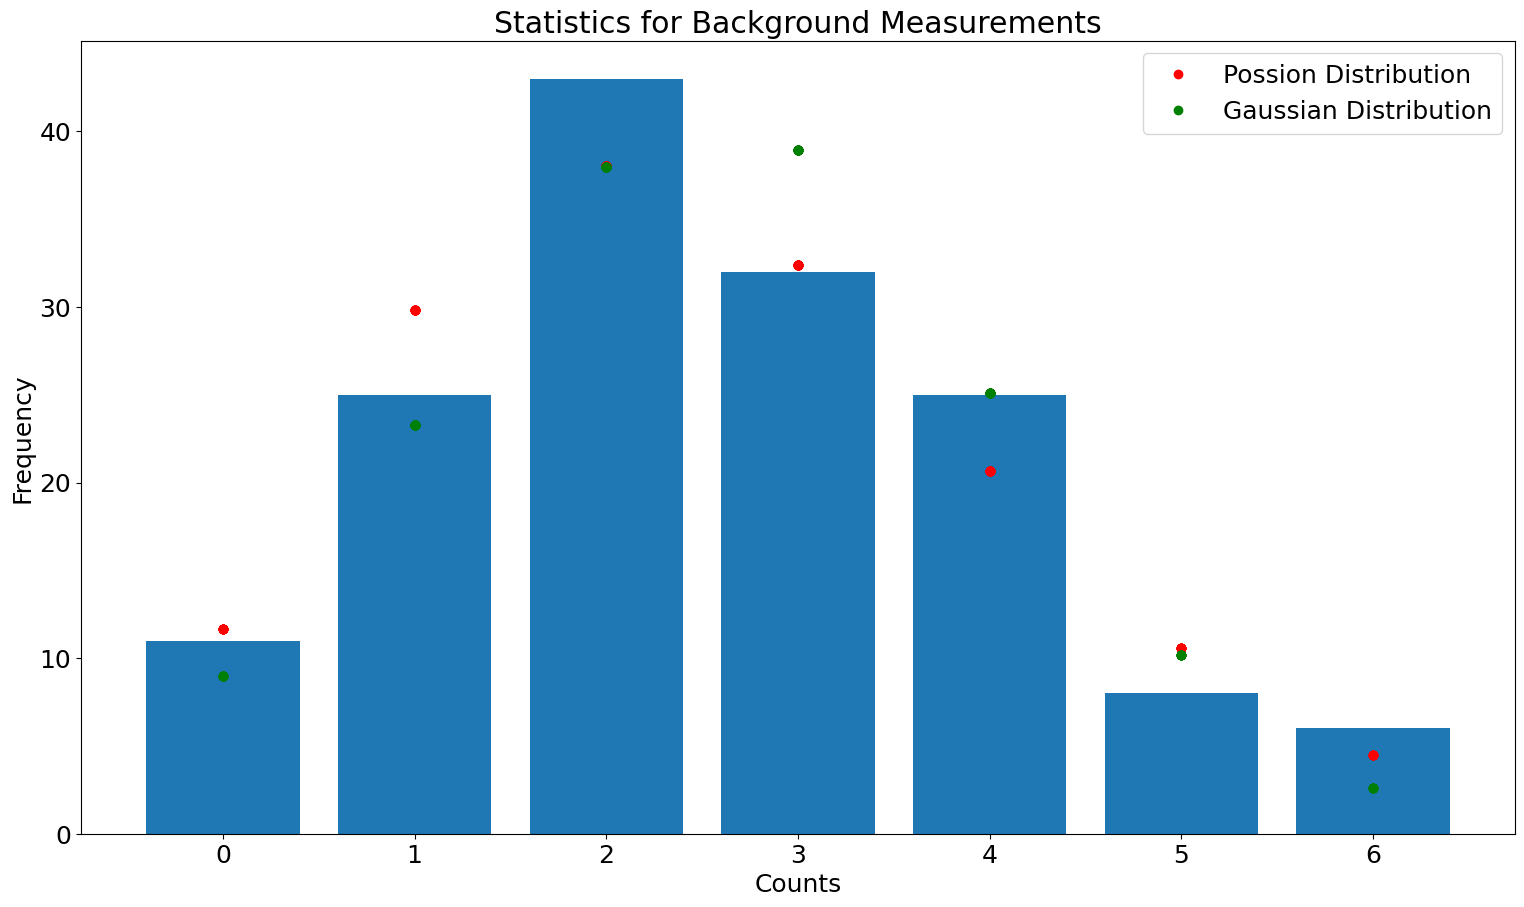

In [54]:
#open files
background = open("338pm-lab2.tsv")
read_background = csv.reader(background, delimiter="\t")


#skip headers
for line in range(11):
    next(read_background, None)

#extract data 
count_bg = []

for row in read_background:
    count_bg.append(float(row[2]))
    
    
#frequency
c0 = 0
c1 = 0
c2 = 0 
c3 = 0 
c4 = 0
c5 = 0 
c6 = 0

for elem in count_bg:
    if elem == 0.0:
        c0 += 1
    if elem == 1.0:
        c1 += 1
    if elem == 2.0:
        c2 += 1
    if elem == 3.0:
        c3 += 1
    if elem == 4.0:
        c4 += 1
    if elem == 5.0:
        c5 += 1
    if elem == 6.0:
        c6 += 1

freq = [c0,c1,c2,c3,c4,c5,c6]
freq_label = ["0","1","2","3","4","5","6"]
plt.bar(freq_label,freq)


#poisson 
lmbda = np.average(count_bg)
pois = 150*poisson.pmf(count_bg, lmbda)
plt.plot(count_bg, pois,"ro", label="Possion Distribution")



#gauss
sd = np.std(count_bg)
gauss = 150*(1/(sd * np.sqrt(2 * np.pi))*np.exp( - (count_bg - lmbda)**2 / (2 * sd**2)))
plt.plot(count_bg,gauss,"go", label="Gaussian Distribution")


#figure titles
plt.title('Statistics for Background Measurements')
plt.xlabel("Counts")
plt.ylabel("Frequency")

#adjust figure size
plt.rcParams["font.size"] = 18
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)
plt.legend(loc='best')
plt.show()

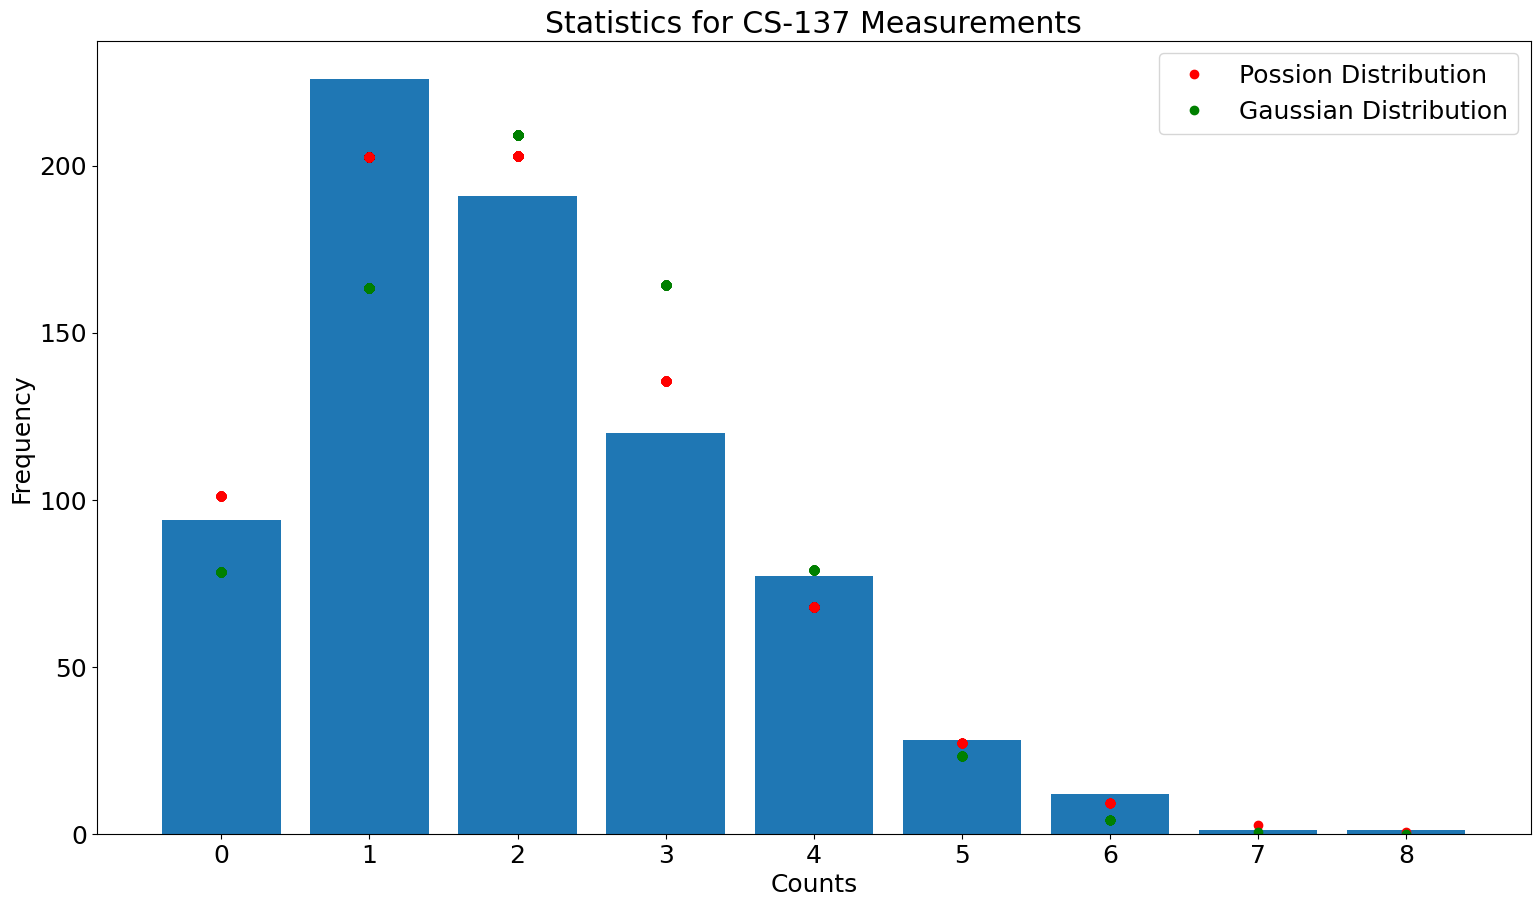

In [65]:
#open files
CS_137 = open("352pm-lab2.tsv")
read_CS = csv.reader(CS_137, delimiter="\t")


#skip headers
for line in range(11):
    next(read_CS, None)

#extract data 
count_CS = []

for row in read_CS:
    count_CS.append(float(row[2]))

    
#frequency
c0 = 0
c1 = 0
c2 = 0 
c3 = 0 
c4 = 0
c5 = 0 
c6 = 0
c7 = 0 
c8 = 0

for elem in count_CS:
    if elem == 0.0:
        c0 += 1
    if elem == 1.0:
        c1 += 1
    if elem == 2.0:
        c2 += 1
    if elem == 3.0:
        c3 += 1
    if elem == 4.0:
        c4 += 1
    if elem == 5.0:
        c5 += 1
    if elem == 6.0:
        c6 += 1
    if elem == 7.0:
        c7 += 1
    if elem == 8.0:
        c8 += 1

freq = [c0,c1,c2,c3,c4,c5,c6,c7,c8]
freq_label = ["0","1","2","3","4","5","6","7","8"]
plt.bar(freq_label,freq)


#poisson 
lmbda = np.average(count_CS)
pois = 750*poisson.pmf(count_CS, lmbda)
plt.plot(count_CS, pois,"ro", label="Possion Distribution")



#gauss
sd = np.std(count_CS)
gauss = 750*(1/(sd * np.sqrt(2 * np.pi))*np.exp( - (count_CS - lmbda)**2 / (2 * sd**2)))
plt.plot(count_CS,gauss,"go", label="Gaussian Distribution")


#figure titles
plt.title('Statistics for CS-137 Measurements')
plt.xlabel("Counts")
plt.ylabel("Frequency")


# adjust figure size
plt.rcParams["font.size"] = 18
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)
plt.legend(loc="best")
plt.show()

# Lab 3: 
## Background 

In [3]:
#open files
background = open("411pm-lab3.tsv")
read_background = csv.reader(background, delimiter="\t")

source = open("427pm-lab3.tsv")
read_source = csv.reader(source, delimiter="\t")

#skip headers
for line in range(11):
    next(read_background, None)
    next(read_source, None)
    
#extract data 
count_bg = []
count_source = []

for row in read_background:
    count_bg.append(float(row[2]))
    
for row in read_source:
    count_source.append(float(row[2]))

ave_background = np.average(count_bg)
ave_true = np.average(count_source)

print(ave_background/5, ave_true/5)

31.8 1430.2666666666667


# Lab 5: 
## Geiger Tube Efficiency 


In [169]:
#open files
background = open("446pm-lab5.tsv")
read_background = csv.reader(background, delimiter="\t")

PO = open("448pm-lab5.tsv")
read_PO = csv.reader(PO, delimiter="\t")

SR = open("449pm-lab5.tsv")
read_SR = csv.reader(SR, delimiter="\t")

CO = open("453pm-lab5.tsv")
read_CO = csv.reader(CO, delimiter="\t")


#skip headers
for line in range(11):
    next(read_background, None)
    next(read_PO, None)
    next(read_SR, None)
    next(read_CO, None)


#extract data
count_bg = 0
count_PO = []
count_SR = []
count_CO = []

for row in read_background:
    count_bg += float(row[2])

for row in read_PO:
    count_PO.append(float(row[2]))

for row in read_SR:
    count_SR.append(float(row[2]))
    
for row in read_CO:
    count_CO.append(float(row[2]))


#correction for resolving time 
deadtime = 0.022/60
r_bg = (count_bg/(1-(count_bg*deadtime)))
r_PO = []
r_SR = []
r_CO = []


for elem in count_PO:
    r_PO.append((elem/(1-(elem*deadtime))))
    
for elem in count_SR:
    r_SR.append((elem/(1-(elem*deadtime))))

for elem in count_CO:
    r_CO.append((elem/(1-(elem*deadtime))))


#correction for background 
b_PO = []
b_SR = []
b_CO = []

for elem in r_PO:
    b_PO.append(elem-r_bg)

for elem in r_SR:
    b_SR.append(elem-r_bg)

for elem in r_CO:
    b_CO.append(elem-r_bg)


#constants
dpm_con = 2.20*10**6
PO = 0.1
SR = 0.1
CO = 1


#efficeny 
e_PO = 0 
e_SR = 0
e_CO = 0 


for elem in count_PO:
    e_PO += ((elem*100)/(PO*dpm_con))

for elem in count_SR:
    e_SR += ((elem*100)/(SR*dpm_con))
    
for elem in count_CO:
    e_CO += ((elem*100)/(CO*dpm_con))
    
print(e_PO,e_SR,e_CO)

0.017272727272727273 1.5945454545454545 0.5166818181818181


# Lab 6:
## Shelf Ratios

In [11]:
#open files
shelf = open("235pm-lab6.tsv")
read_shelf = csv.reader(shelf, delimiter="\t")

#skip headers
for line in range(11):
    next(read_shelf, None)
    
#extract data
count_shelf = []

for row in read_shelf:
    count_shelf.append(float(row[2]))

bg = count_shelf[0]

#delete extra measurement of first shelf and background
del count_shelf[-1]


#correction for resolving time 
c_shelf = []
deadtime = (0.022/60)/2

for elem in count_shelf:
    c_shelf.append((elem/(1-(elem*deadtime))))

#background 
bg = c_shelf[0]
del c_shelf[0]

#correction for background
c2_shelf = []
for elem in count_shelf:
    c2_shelf.append(elem-bg)
    
#ratios
s2 = c_shelf[1]
ratios = []

for elem in  c_shelf:
    ratios.append(elem/s2)

print(ratios)

[0.3627016594034887, 1.0, 0.5899317616075889, 0.7720167248530647, 0.6809407689327468, 0.7720167248530647, 0.9087563490373795, 0.7720167248530647, 0.6354279013103329, 0.4535436178448367]


# Lab 7
## Backscattering

### Part 1 - Atomic Number Dependence 

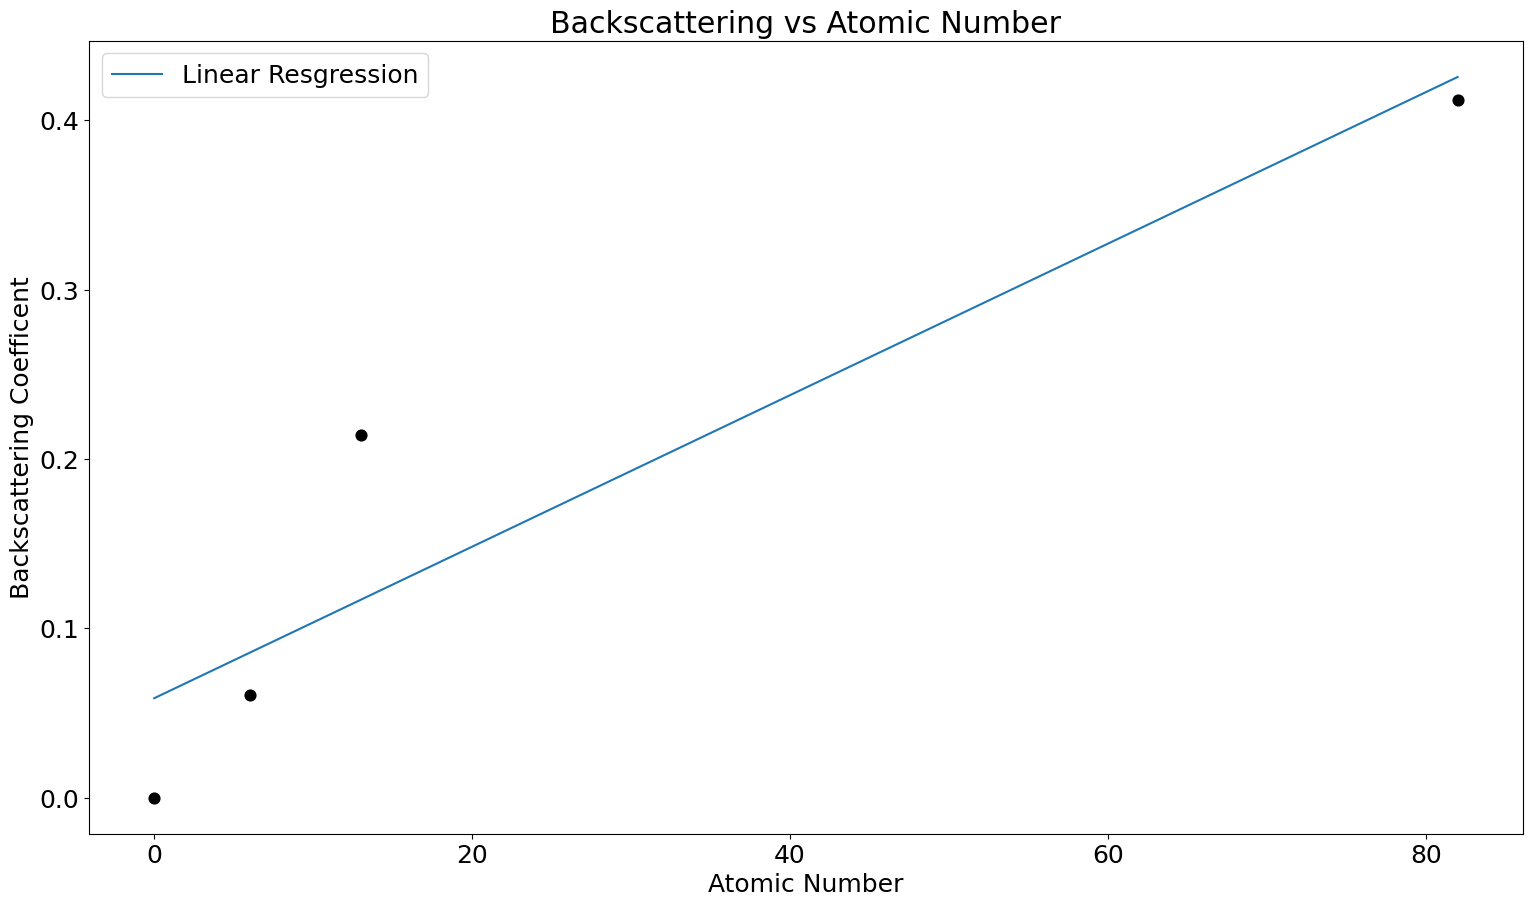

In [20]:
#open files
back = open("248pm-lab7.tsv")
read_back = csv.reader(back, delimiter="\t")

#skip headers
for line in range(11):
    next(read_back, None)
    
    
#extract data
count_back = []

for row in read_back:
    count_back.append(float(row[2]))

    
#correction for resolving time 
c_back = []
deadtime = 0.022/60

for elem in count_back:
    c_back.append((elem/abs((1-(elem*deadtime)))))


#delete background
bg = c_back[0]
del c_back[0]  


#correction for background
c2_back = []
for elem in c_back:
    c2_back.append(elem-bg)

    
#backscatt
r_0 = c2_back[0]
backscatt = []

for elem in c2_back:
    backscatt.append((elem - r_0)/r_0)


#backscatt correction
final = []
for i in range(len(c2_back)):
    final.append(abs((c2_back[i]-(c2_back[i]*backscatt[i]))))


    
#plot
atomic = [0,6,13,13,82,13,6,6,6,13,13,13,13,13,13,13,13,13,82,82,82]

#select absorbers
x = []
x.append(atomic[0])
x.append(atomic[1])
x.append(atomic[2])
x.append(atomic[4])
y = []
y.append(backscatt[0])
y.append(backscatt[1])
y.append(backscatt[2])
y.append(backscatt[4])

plt.scatter(x,y, s=60, color='black')

#regression
m, b = np.polyfit(x, y, 1)
y2 = []
for elem in x:
    y2.append((m*elem)+b)
    
plt.plot(x, y2, label="Linear Resgression")

#figure titles
plt.title('Backscattering vs Atomic Number')
plt.xlabel("Atomic Number")
plt.ylabel("Backscattering Coefficent")


# adjust figure size
plt.rcParams["font.size"] = 18
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)
plt.legend(loc="best")
plt.show()

# Part II -  Thickness Dependence

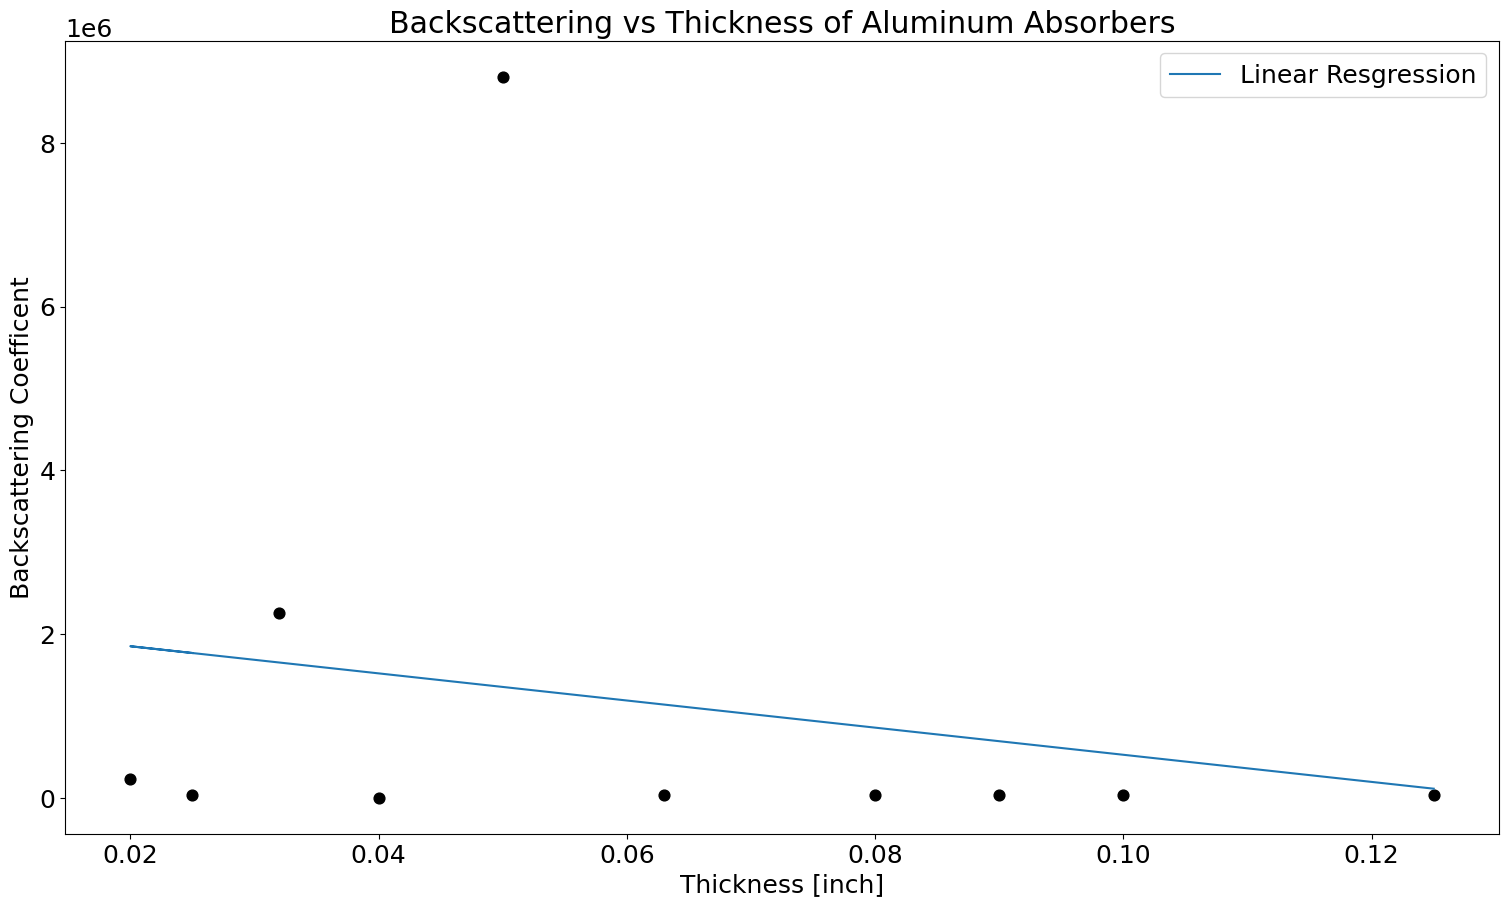

In [25]:
#plot
thick = [0.025,0.02,0.032,0.04,0.05,0.063,0.08,0.09,0.1,0.125]

#select absorbers
y = []
y.append(final[2])
y.append(final[9])
y.append(final[10])
y.append(final[11])
y.append(final[12])
y.append(final[13])
y.append(final[14])
y.append(final[15])
y.append(final[16])
y.append(final[17])

plt.scatter(thick,y, s=60, color='black')

#regression
m, b = np.polyfit(thick, y, 1)
y2 = []
for elem in thick:
    y2.append((m*elem)+b)
    
plt.plot(thick, y2, label="Linear Resgression") 

#figure titles
plt.title('Backscattering vs Thickness of Aluminum Absorbers')
plt.xlabel("Thickness [inch]")
plt.ylabel("Backscattering Coefficent")


# adjust figure size
plt.rcParams["font.size"] = 18
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)
plt.legend(loc="best")
plt.show()

# Lab 8 
## Inverse Sqaure Law

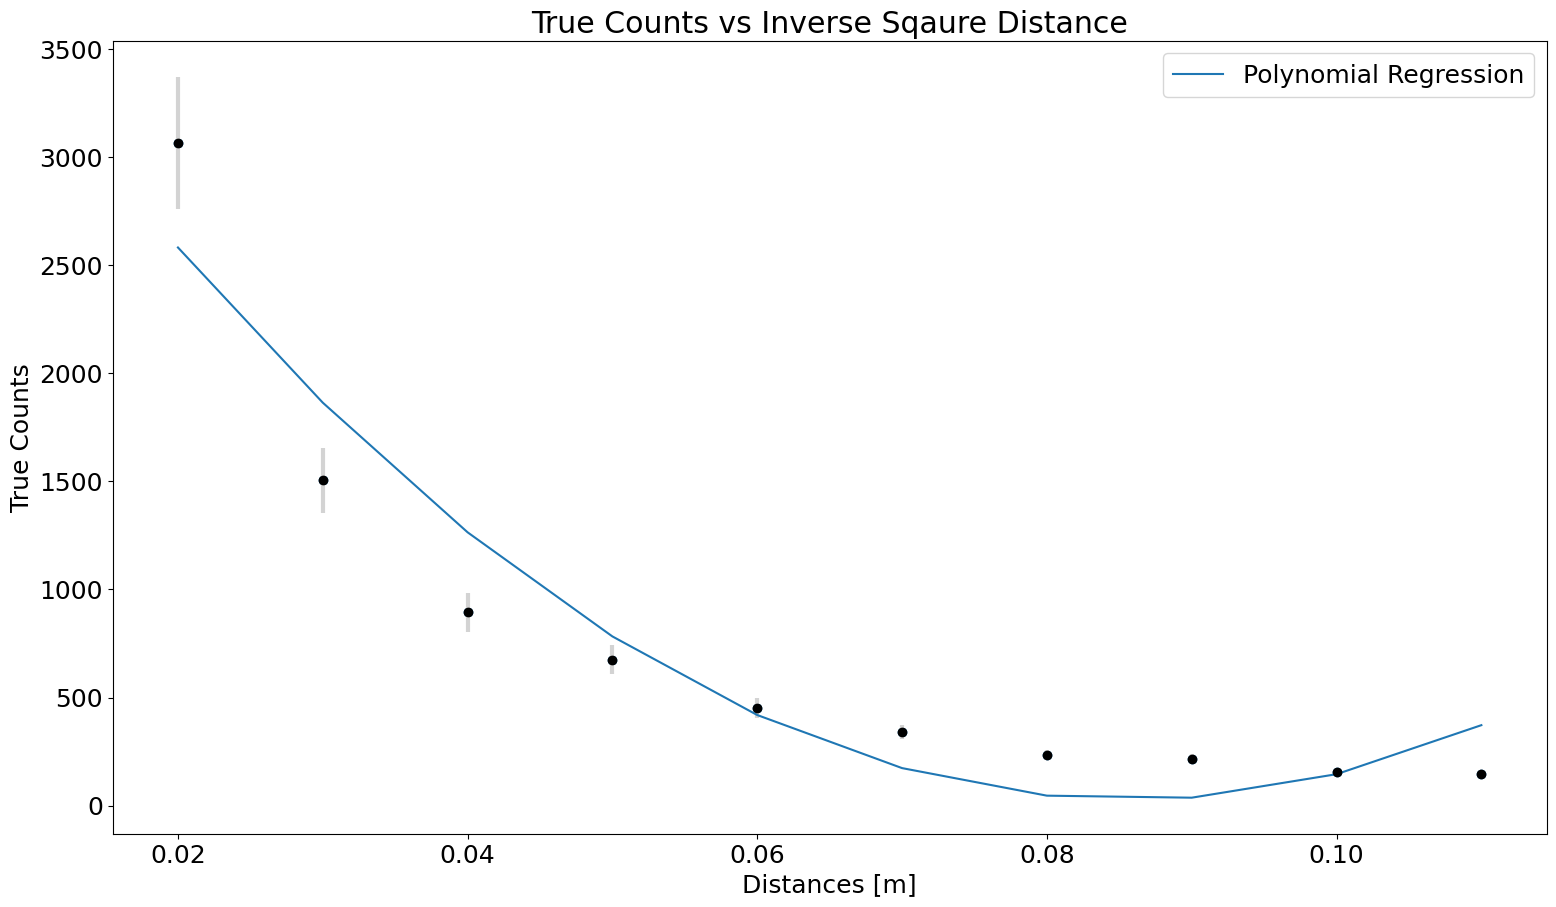

In [31]:
#open files
sl = open("336pm-lab8.tsv")
read_sl = csv.reader(sl, delimiter="\t")

#skip headers
for line in range(11):
    next(read_sl, None)
    
    
#extract data
count_sl = []

for row in read_sl:
    count_sl.append(float(row[2]))

    
#correction for resolving time 
c_sl = []
deadtime = (0.022/60)/2

for elem in count_sl:
    c_sl.append((elem/abs((1-(elem*deadtime)))))


#delete background
bg = c_sl[0]
del c_sl[0]  


#correction for background
c2_sl = []
for elem in c_sl:
    c2_sl.append(elem-bg)
    
#distances
dis = [0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11]

squared = []

for elem in dis:
    squared.append(elem**(-2))
    

#plot
#plt.scatter(squared,c2_sl)
plt.scatter(dis,c2_sl)

#regression
p = np.polyfit(dis,c2_sl,2)
y1 = np.polyval(p,dis)
plt.plot(dis,y1, label = 'Polynomial Regression')

#errors
y_error = []

for elem in c2_sl:
    y_error.append(elem*0.10)

plt.errorbar(dis, c2_sl, yerr= y_error, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)

#figure titles
plt.title('True Counts vs Inverse Sqaure Distance')
plt.xlabel("Distances [m]")
plt.ylabel("True Counts")


# adjust figure size
plt.rcParams["font.size"] = 18
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)
plt.legend(loc="best")
plt.show()

# Lab 9
## Range of Alpha Particles

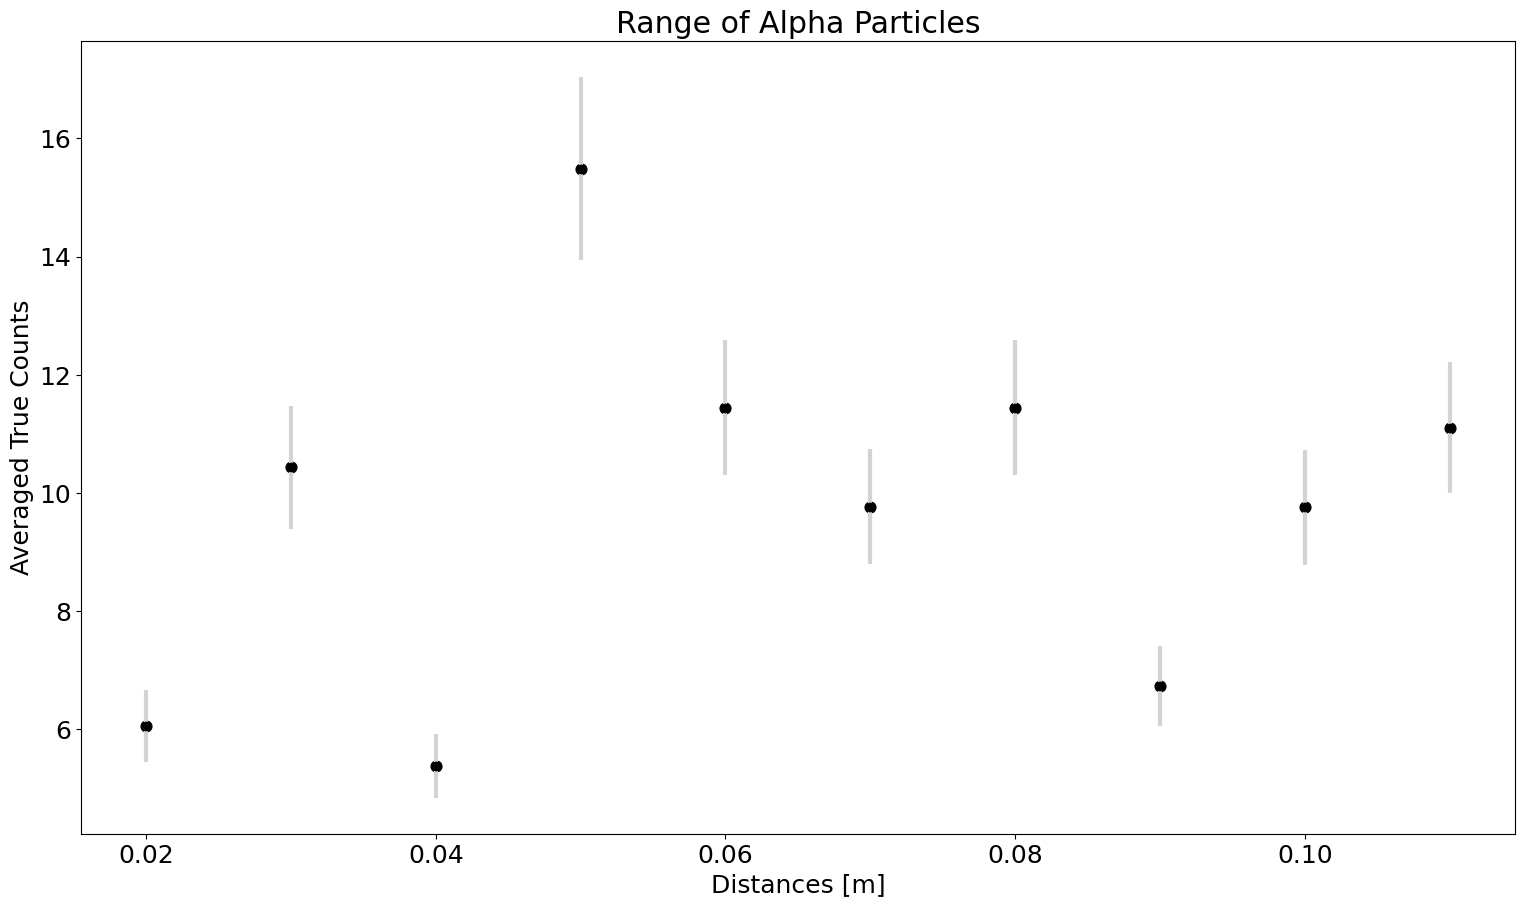

In [33]:
#open files
alp = open("349pm-lab9.tsv")
read_alp = csv.reader(alp, delimiter="\t")

#skip headers
for line in range(11):
    next(read_alp, None)
    
    
#extract data
count_alp = []

for row in read_alp:
    count_alp.append(float(row[2]))

    
#correction for resolving time 
c_alp = []
deadtime = (0.022/60)/2

for elem in count_alp:
    c_alp.append((elem/abs((1-(elem*deadtime)))))
    

#background
x = c_alp[0] + c_alp[1] + c_alp[2]
bg = x/3

#correction for background
c2_alp = []
for elem in c_alp:
    c2_alp.append(elem-bg)
    
#average counts per shelf
ave = []
for i in range(0,32,3):
    ave.append(np.average([c2_alp[i],c2_alp[i+1],c2_alp[i+2]]))

del [ave[0]]

#distances
dis = [0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11]

#plot
plt.scatter(dis,ave, s=60, color='black')

#errors
y_error = []

for elem in ave:
    y_error.append(elem*0.10)

plt.errorbar(dis, ave, yerr= y_error, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)


#figure titles
plt.title('Range of Alpha Particles')
plt.xlabel("Distances [m]")
plt.ylabel("Averaged True Counts")


# adjust figure size
plt.rcParams["font.size"] = 18
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)
plt.show()

#what in the actual fuck is this plot 

# Lab 10 
## Absorption of Beta Particles

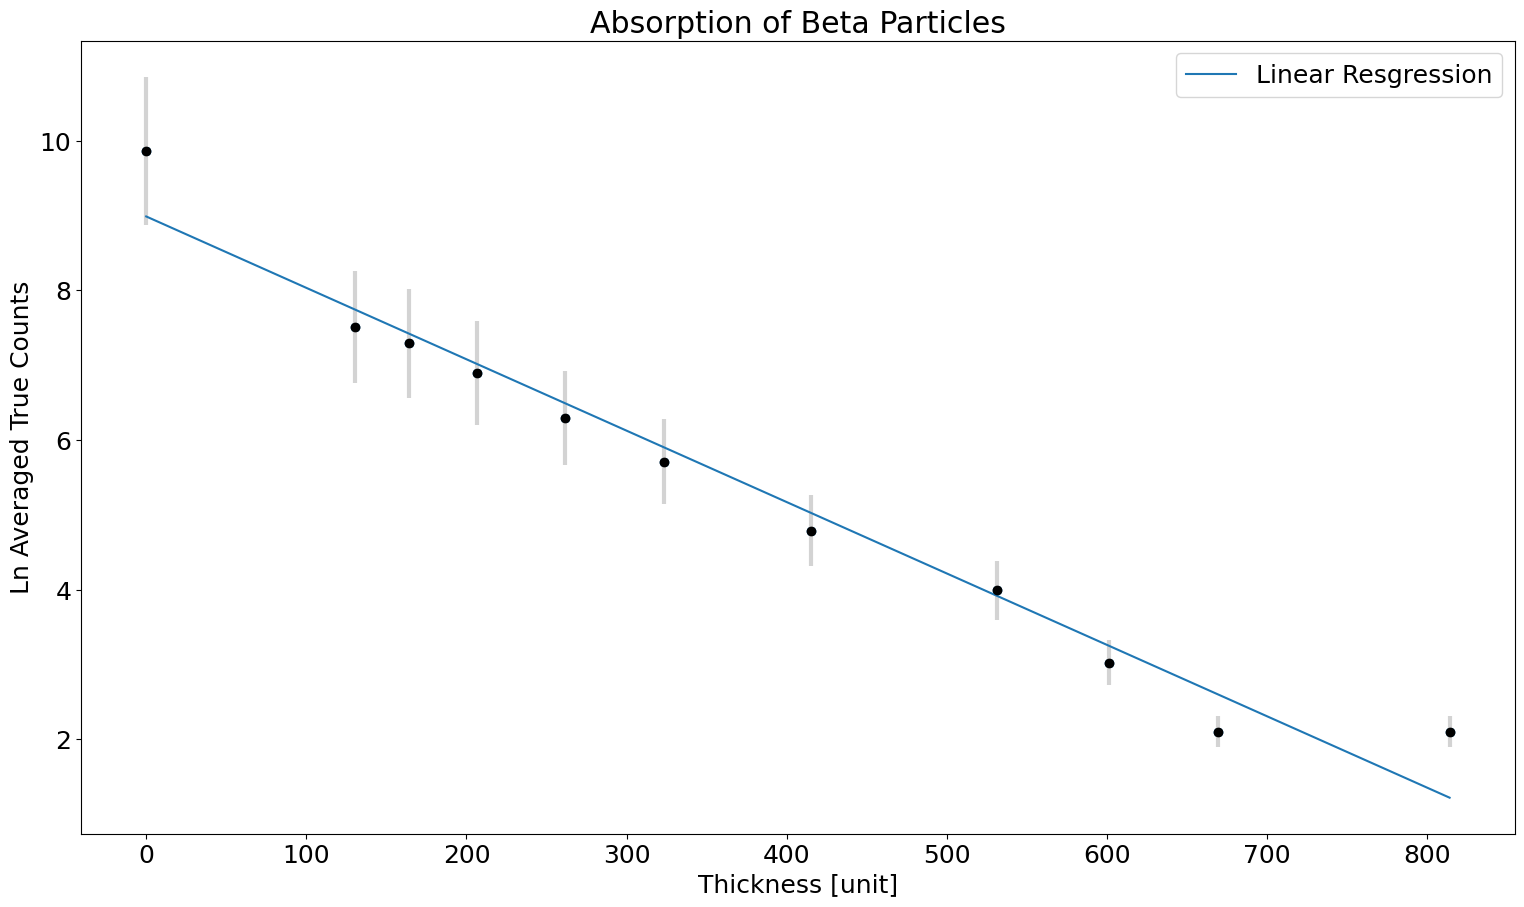

In [37]:
#open files
beta = open("430pm-lab10.tsv")
read_beta = csv.reader(beta, delimiter="\t")

#skip headers
for line in range(11):
    next(read_beta, None)
    
    
#extract data
count_beta = []

for row in read_beta:
    count_beta.append(float(row[2]))

    
#correction for resolving time 
c_beta = []
deadtime = (0.022/60)

for elem in count_beta:
    c_beta.append((elem/abs((1-(elem*deadtime)))))
    

#background
bg = c_beta[0]
del c_beta[0]

#correction for background
c2_beta = []
for elem in c_beta:
    c2_beta.append(elem-bg)
    
    
#thickness of absorbers 
thick = [0,130.7,163.9,206.7,261.4,323.5,415.1,531.5,601,669.6,814]

#convert to ln 
ln_beta = []

for elem in c2_beta:
    ln_beta.append(np.log(elem))

    
#plot
plt.scatter(thick,ln_beta)


#regression
m, b = np.polyfit(thick, ln_beta, 1)
y2 = []
for elem in thick:
    y2.append((m*elem)+b)
    
plt.plot(thick, y2, label="Linear Resgression") 


#errors
y_error = []

for elem in ln_beta:
    y_error.append(elem*0.10)

plt.errorbar(thick, ln_beta, yerr= y_error, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)


#figure titles
plt.title('Absorption of Beta Particles')
plt.xlabel("Thickness [unit]")
plt.ylabel("Ln Averaged True Counts")


# adjust figure size
plt.rcParams["font.size"] = 18
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)
plt.legend(loc="best")
plt.show()

# Lab 11
## Beta Decay Energy 


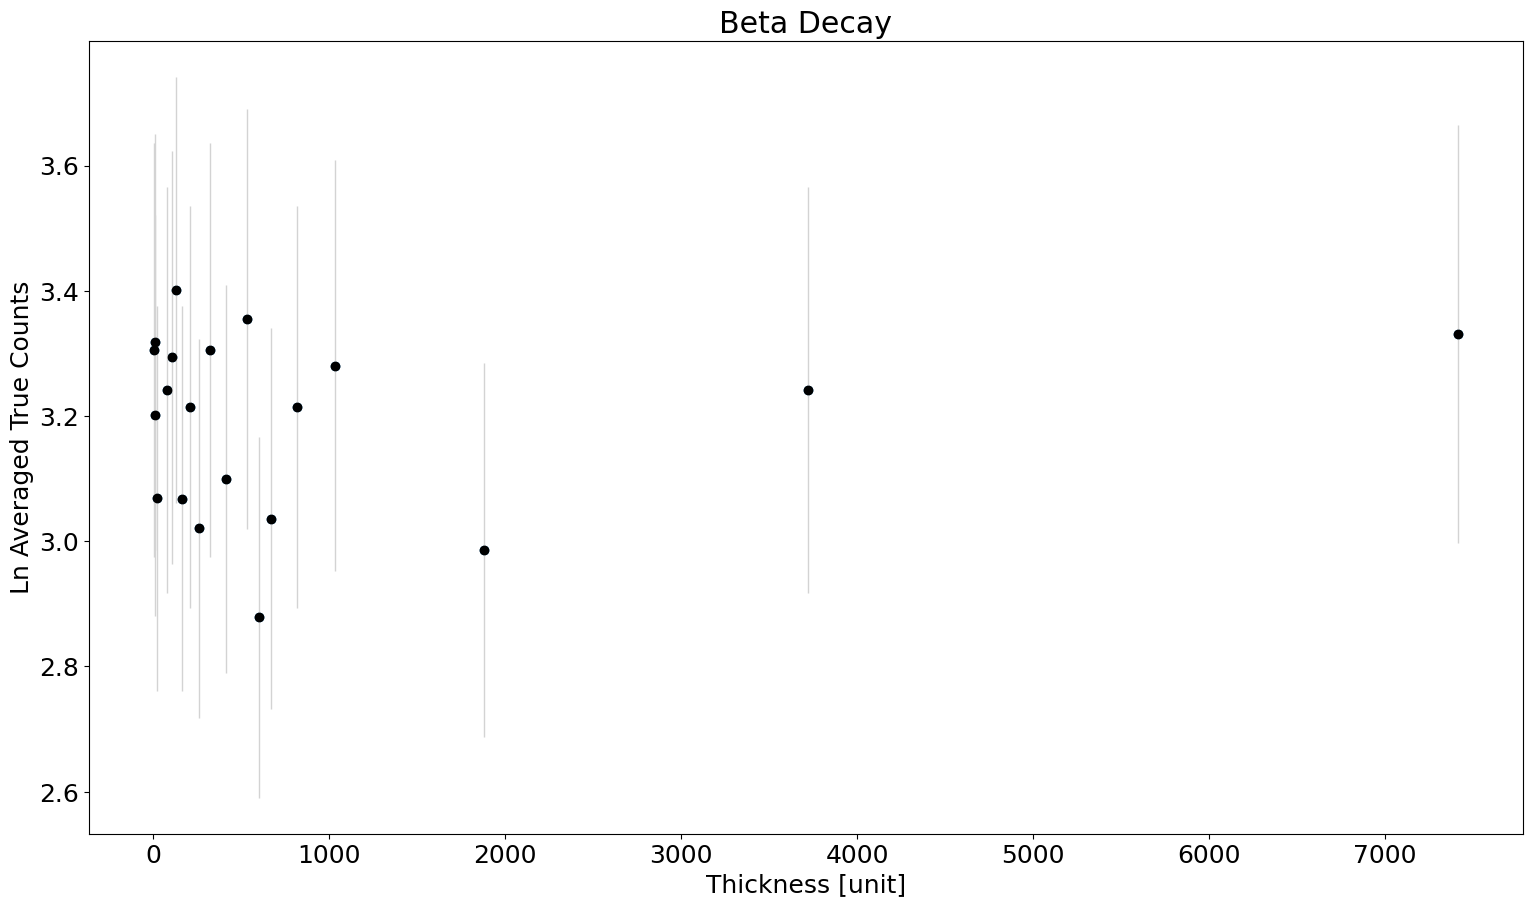

In [53]:
#open files
betadec = open("303pm-lab11.tsv")
read_betadec = csv.reader(betadec, delimiter="\t")

#skip headers
for line in range(11):
    next(read_betadec, None)
    
    
#extract data
count_betadec = []

for row in read_betadec:
    count_betadec.append(float(row[2]))

    
#correction for resolving time 
c_betadec = []
deadtime = (0.022/60)

for elem in count_betadec:
    c_betadec.append((elem/abs((1-(elem*deadtime)))))
        

#average counts per shelf
ave = []
for i in range(0,60,3):
    ave.append(np.average([c_betadec[i],c_betadec[i+1],c_betadec[i+2]]))


    
#thickness of absorbers 
thick = [4.5,6.5,9.6,19.20,76.4,104.1,130.7,163.9,206.7,261.4,323.5,415.1,531.5,601,669.6,814,1031.3,1878.3,3721.8,7413.8]

#convert to ln 
ln_betadec = []

for elem in ave:
    ln_betadec.append(np.log(abs(elem)))

#plot
plt.scatter(thick,ln_betadec)

#errors
y_error = []

for elem in ln_betadec:
    y_error.append(elem*0.10)

plt.errorbar(thick, ln_betadec, yerr= y_error, fmt='o', color='black',
             ecolor='lightgray', elinewidth=1, capsize=0)

#figure titles
plt.title('Beta Decay')
plt.xlabel("Thickness [unit]")
plt.ylabel("Ln Averaged True Counts")


# adjust figure size
plt.rcParams["font.size"] = 18
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)
plt.show()

#what in the actual fuck is this plot

# Lab 12 
## Aborption of Gamma Particles 

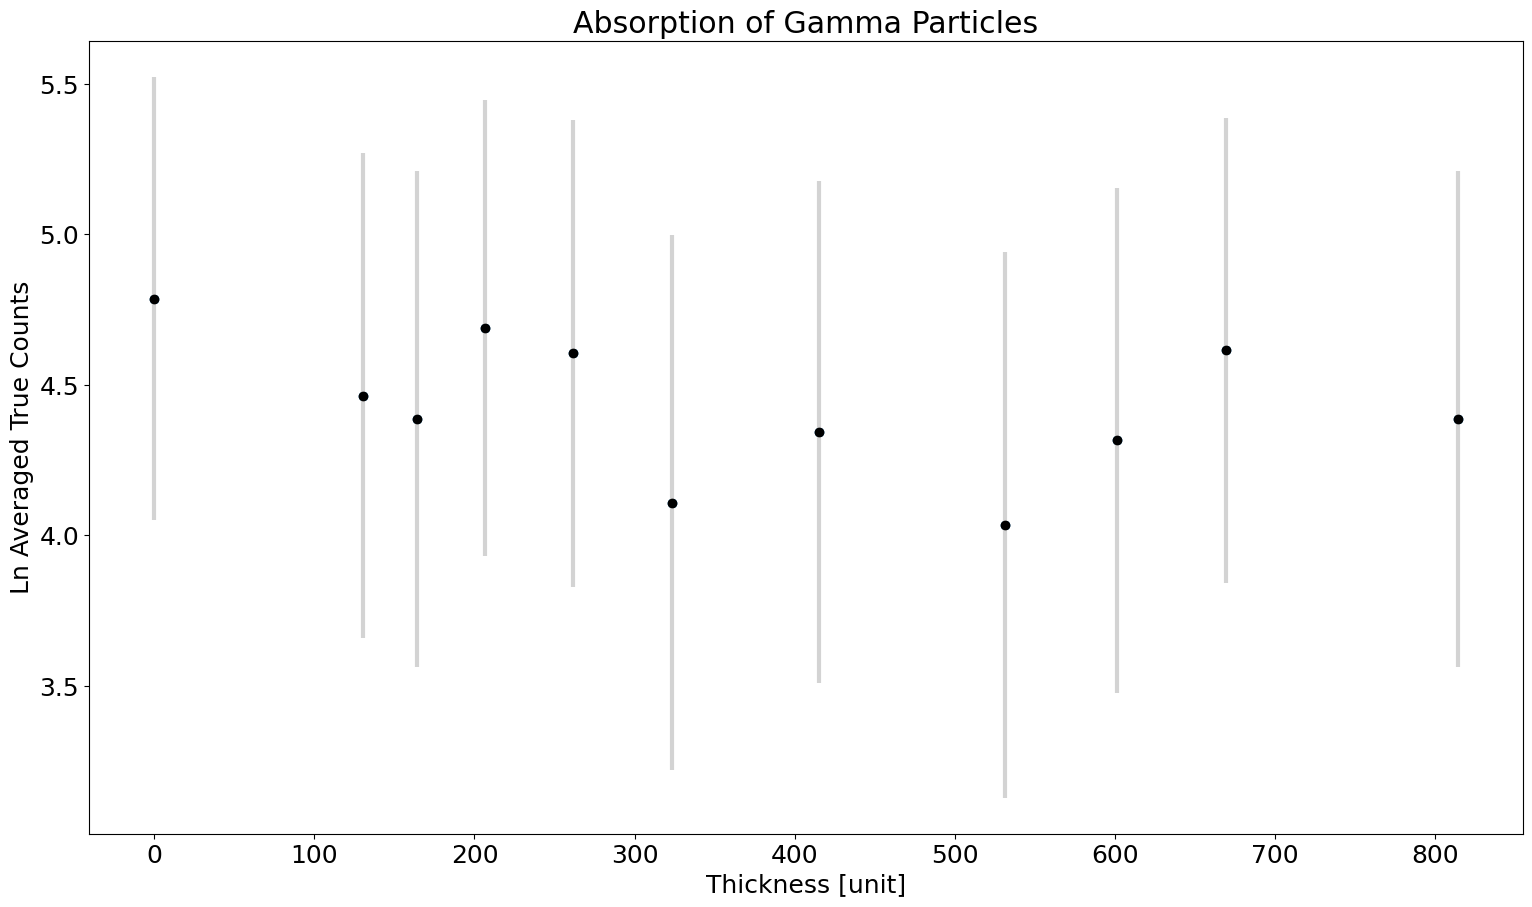

In [42]:
#open files
gamma = open("447pm-lab12.tsv")
read_gamma = csv.reader(gamma, delimiter="\t")

#skip headers
for line in range(11):
    next(read_gamma, None)
    
    
#extract data
count_gamma = []

for row in read_gamma:
    count_gamma.append(float(row[2]))

    
#correction for resolving time 
c_gamma = []
deadtime = (0.022/60)

for elem in count_gamma:
    c_gamma.append((elem/abs((1-(elem*deadtime)))))
    

#background
bg = c_gamma[0]
del c_gamma[0]

#correction for background
c2_gamma = []
for elem in c_gamma:
    c2_gamma.append(elem-bg)
    
    
#thickness of absorbers 
thick = [0,130.7,163.9,206.7,261.4,323.5,415.1,531.5,601,669.6,814]

#convert to ln 
ln_gamma = []

for elem in c2_gamma:
    ln_gamma.append(np.log(elem))

    
#plot
plt.scatter(thick,ln_gamma)

#errors
y_error = []

for elem in ln_gamma:
    y_error.append(np.log(elem*0.10))

plt.errorbar(thick, ln_gamma, yerr= y_error, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)

#figure titles
plt.title('Absorption of Gamma Particles')
plt.xlabel("Thickness [unit]")
plt.ylabel("Ln Averaged True Counts")


# adjust figure size
plt.rcParams["font.size"] = 18
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)
plt.show()

# Lab 13 
## Half-Life of Ba-137m

105.52189094138295
160.98901460608428


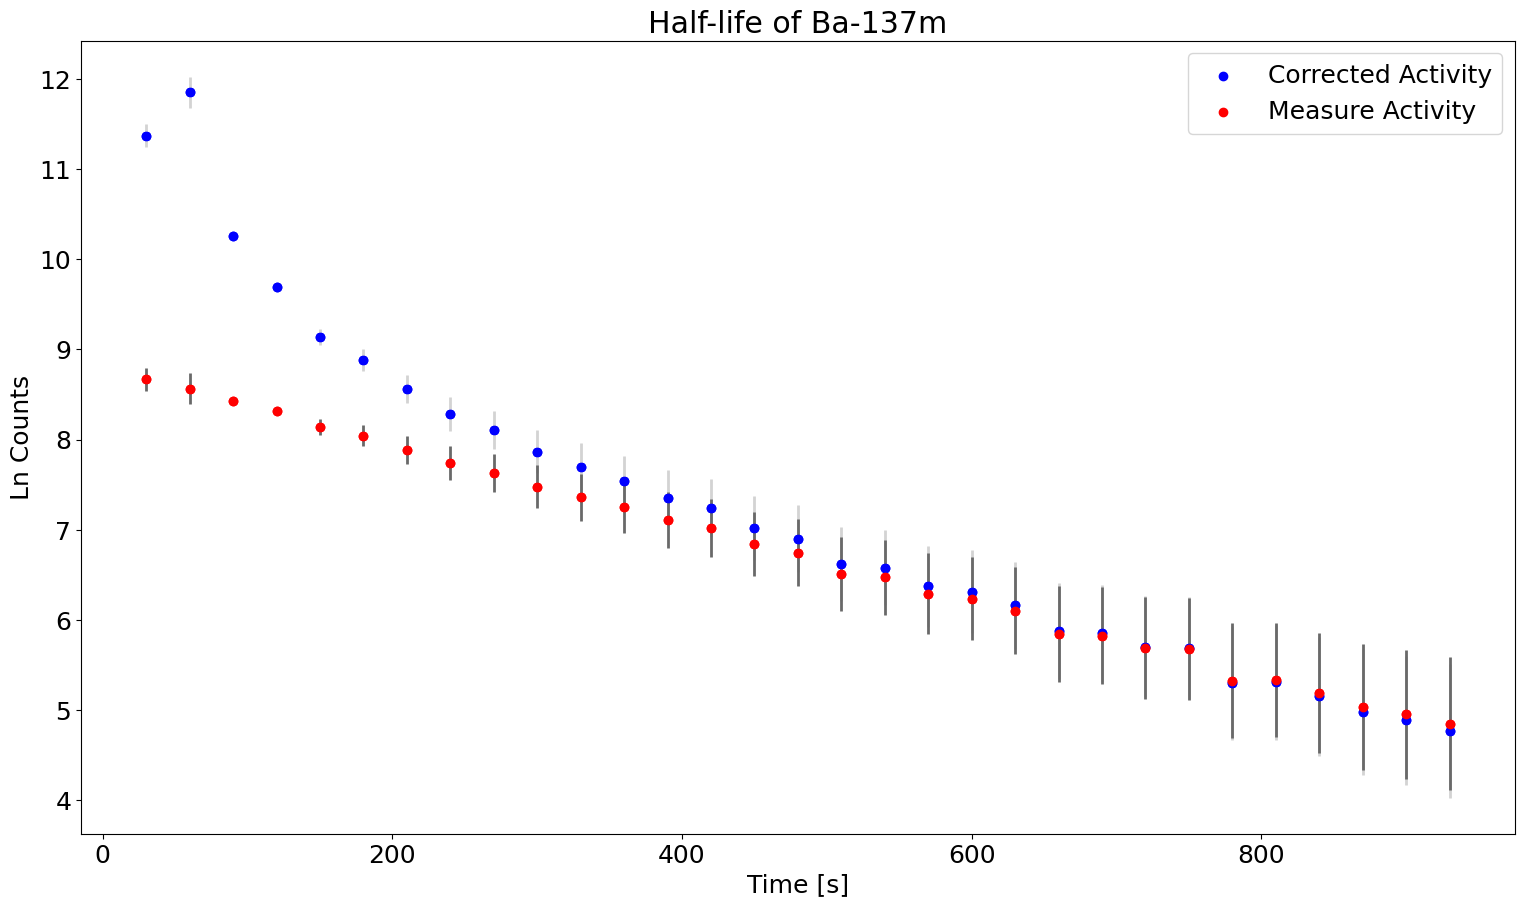

In [52]:
#open files
BA = open("415pm-lab13.tsv")
read_BA = csv.reader(BA, delimiter="\t")

#skip headers
for line in range(11):
    next(read_BA, None)
    
    
#extract data
count_BA = []

for row in read_BA:
    count_BA.append(float(row[2]))

    
#correction for resolving time 
c_BA = []
deadtime = (0.022/60)/2

for elem in count_BA:
    c_BA.append((elem/abs((1-(elem*deadtime)))))
    

#background
bg = c_BA[0]
del c_BA[0]

#correction for background
c2_BA = []
for elem in c_BA:
    c2_BA.append(elem-bg)
    

#convert to ln 
ln_BA1 = []
ln_BA2 = []

for elem in c2_BA:
    ln_BA1.append(np.log(elem))

del count_BA[0]
for elem in count_BA:
    ln_BA2.append(np.log(elem))


#time 
t = np.arange(30,960,30)


#decay constant
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(t, ln_BA1)
print(np.log(2)/abs(slope1))
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(t, ln_BA2)
print(np.log(2)/abs(slope2))



#plot
plt.scatter(t,ln_BA1, color = 'blue', label = "Corrected Activity")
plt.scatter(t,ln_BA2, color = 'red', label = "Measure Activity")

#errors
y_error = []

for elem in ln_BA1:
    y_error.append(np.log(elem*0.10))

plt.errorbar(t, ln_BA1, yerr= y_error, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=2, capsize=0)

y_error2 = []

for elem in ln_BA2:
    y_error2.append(np.log(elem*0.10))

plt.errorbar(t, ln_BA2, yerr= y_error, fmt='o', color='red',
             ecolor='dimgrey', elinewidth=2, capsize=0)

#figure titles
plt.title('Half-life of Ba-137m')
plt.xlabel("Time [s]")
plt.ylabel("Ln Counts")


# adjust figure size
plt.rcParams["font.size"] = 18
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)
plt.legend(loc="best")
plt.show()